In [1]:
import numpy as np
import pandas as pd
from scipy import log,exp,sqrt,stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')
import numpy.random as npr

In [2]:
def BS_Call_Exact(S,X,r,sigma,T,t):

    d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
    d2 = d1-sigma*sqrt((T-t))
    
    ST = S*stats.norm.cdf(d1) - X*exp(-r*(T-t))*stats.norm.cdf(d2)
    
    return ST


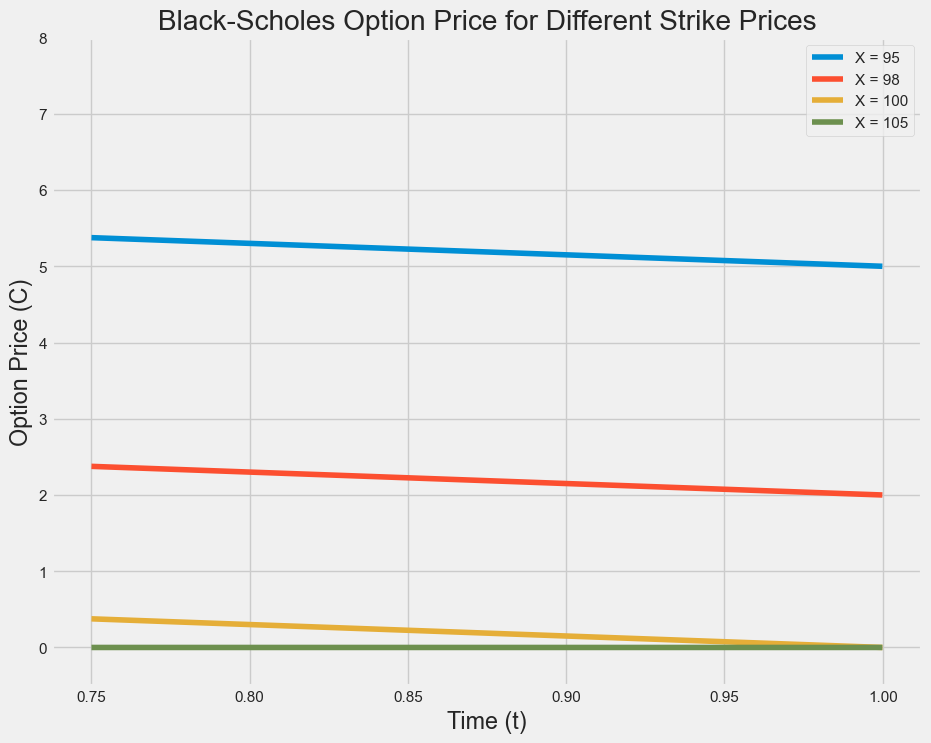

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example function BS_Call_Exact, replace with your actual function
def BS_Call_Exact(S, K, r, sigma, T, t):
    # Replace with your Black-Scholes calculation
    return np.maximum(S * np.exp((r - 0.5 * sigma**2) * (T - t)) - K, 0)

# Generate values for t
t = np.arange(0.75, 1.0, 0.0001)

plt.figure(figsize=(10, 8))

# Plot each line individually with sns.lineplot
sns.lineplot(x=t, y=BS_Call_Exact(100, 95, 0.06, 0.3, 1, t), label='X = 95')
sns.lineplot(x=t, y=BS_Call_Exact(100, 98, 0.06, 0.3, 1, t), label='X = 98')
sns.lineplot(x=t, y=BS_Call_Exact(100, 100, 0.06, 0.3, 1, t), label='X = 100')
sns.lineplot(x=t, y=BS_Call_Exact(100, 105, 0.06, 0.3, 1, t), label='X = 105')

plt.xlabel('Time (t)')
plt.ylabel('Option Price (C)')
plt.ylim(-0.5, 8)

plt.legend()
plt.title('Black-Scholes Option Price for Different Strike Prices')

plt.show()


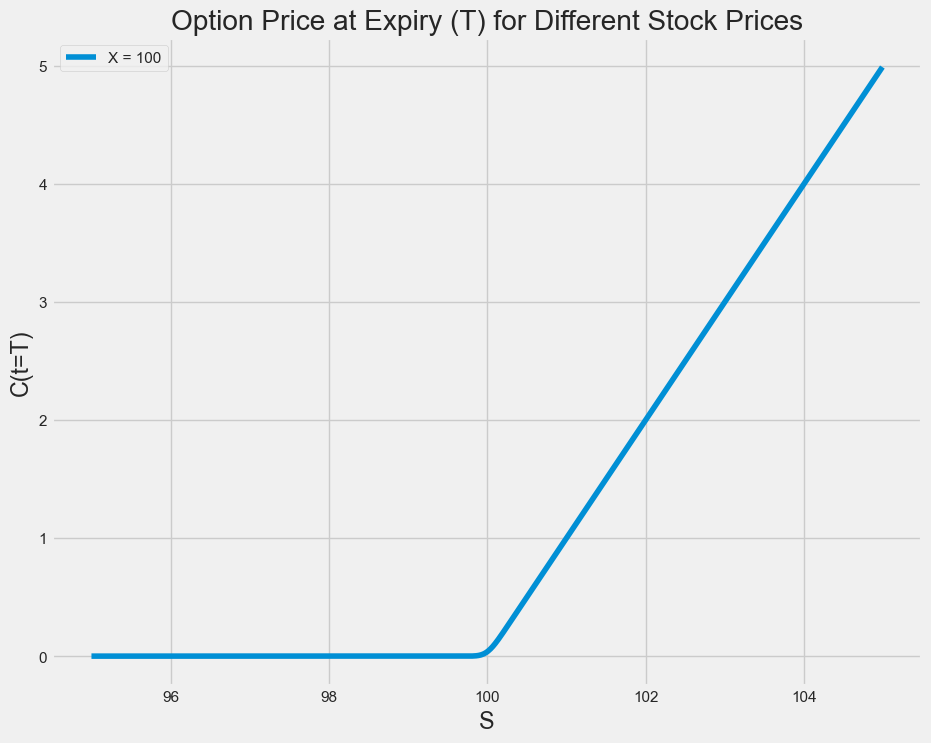

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm  # Import norm from scipy.stats

# Example function BS_Call_Exact, replace with your actual function
def BS_Call_Exact(S, K, r, sigma, T, t):
    # Replace with your Black-Scholes calculation
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2 = d1 - sigma * np.sqrt(T - t)
    return S * norm.cdf(d1) - K * np.exp(-r * (T - t)) * norm.cdf(d2)

# Generate values for S
s = np.arange(95, 105, 0.01)

plt.figure(figsize=(10, 8))

# Plotting using sns.lineplot
sns.lineplot(x=s, y=BS_Call_Exact(s, 100, 0.06, 0.3, 1, 0.99999), label='X = 100')

plt.xlabel('S')
plt.ylabel('C(t=T)')
plt.title('Option Price at Expiry (T) for Different Stock Prices')

plt.legend()
plt.show()


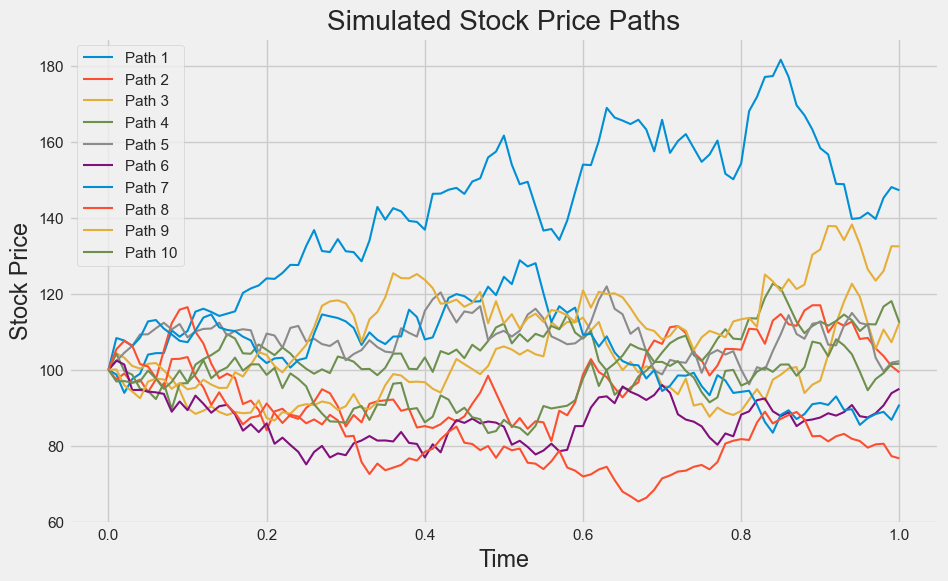

In [9]:
import numpy as np
import numpy.random as npr

r = 0.06
sigma = 0.3
T = 1.0
S0 = 100

I = 100000
M = 100

dt = T / M

# Initialize S array
S = np.zeros((M+1, I))
S[0] = S0

# Generate random numbers for the simulation
random_numbers = npr.standard_normal((M+1, I))

# Simulate stock prices
for t in range(1, M+1):
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_numbers[t])

# Note: Use numpy.exp and numpy.sqrt instead of scipy.exp and scipy.sqrt

# Example of how to plot the results
import matplotlib.pyplot as plt

# Plot the first 10 paths
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(np.arange(0, T + dt, dt), S[:, i], lw=1.5, label=f'Path {i+1}')

plt.title('Simulated Stock Price Paths')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


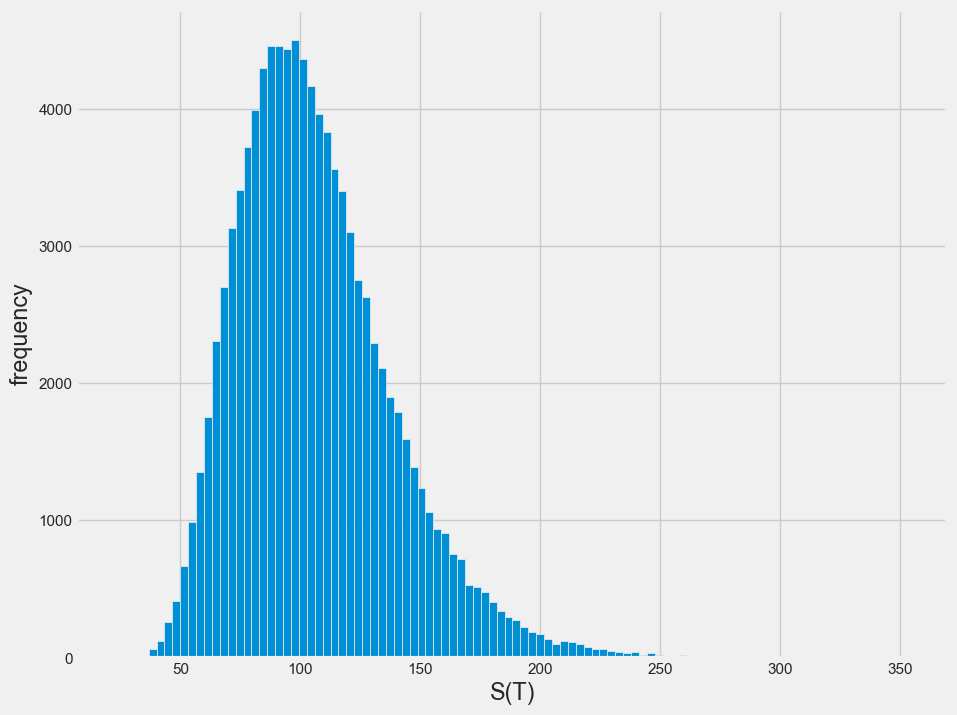

In [10]:
plt.figure(figsize=(10, 8))
plt.hist(S[-1], bins=100)
plt.xlabel('S(T)')
plt.ylabel('frequency')
plt.show()

In [11]:
def BS_Call_MC(S,X,r,sigma,T,t,I):
    
    data = np.zeros((I, 2))
    
    z = np.random.normal(0, 1, [1, I])
    
    #z = npr.standard_normal(I)
    
    ST = S*exp((T-t)*(r - 0.5*sigma**2)+sigma*sqrt(T-t)*z)
    
    data[:,1] = ST - X
    
    average = np.sum(np.amax(data, axis=1))/float(I)
    
    return np.exp(-r*(T-t))*average

In [14]:
import numpy as np
import numpy.random as npr

def BS_Call_MC(S, K, r, sigma, T, t, I):
    dt = T - t
    z = npr.standard_normal(I)
    ST = S * np.exp(dt * (r - 0.5 * sigma**2) + sigma * np.sqrt(dt) * z)
    payoff = np.maximum(ST - K, 0)
    return np.exp(-r * dt) * np.mean(payoff)

print('Monte Carlo:',BS_Call_MC(100,95,0.06,0.3,1,.999,100000))
print('Exact: ',BS_Call_Exact(100,95,0.06,0.3,1,.999))


Monte Carlo: 5.009054798563246
Exact:  5.005699833982007


In [15]:
print('Monte Carlo:',BS_Call_MC(100,95,0.06,0.3,1,.75,100000))
print('Exact: ',BS_Call_Exact(100,95,0.06,0.3,1,.75))

Monte Carlo: 9.496663616094239
Exact:  9.548802012535894


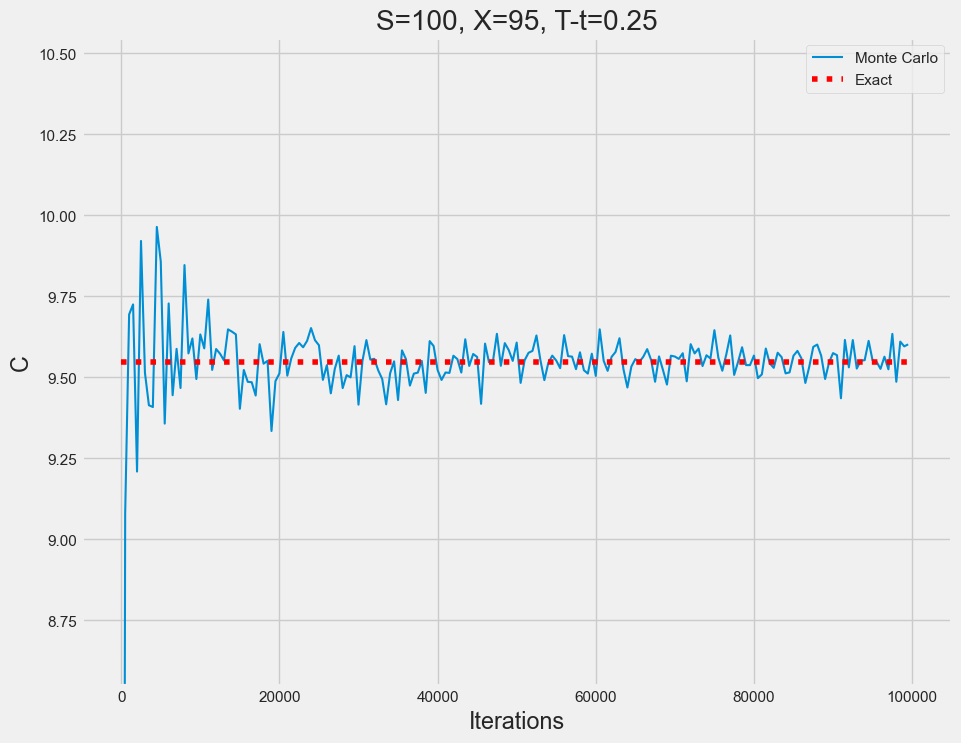

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy.random as npr

# Create empty lists to store data
iterations = []
bsc_values = []

# Iterate over different number of iterations
for i in range(1, 100000, 500):
    iterations.append(i)
    bsc_values.append(BS_Call_MC(100, 95, 0.06, 0.3, 1, 0.75, i))

# Create DataFrame from lists
df = pd.DataFrame({
    'Iter': iterations,
    'BSc': bsc_values
})

# Plotting
plt.figure(figsize=(10, 8))

# Plot Monte Carlo simulation results
plt.plot(df['Iter'], df['BSc'], lw=1.5, label='Monte Carlo')

# Plot exact solution as a dotted red line
plt.hlines(BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.75), xmin=0, xmax=100000, linestyle='dotted', colors='red', label='Exact')

plt.title('S=100, X=95, T-t=0.25')
plt.xlabel('Iterations')
plt.ylabel('C')
plt.ylim(BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.75) - 1, BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.75) + 1)
plt.legend()
plt.grid(True)
plt.show()


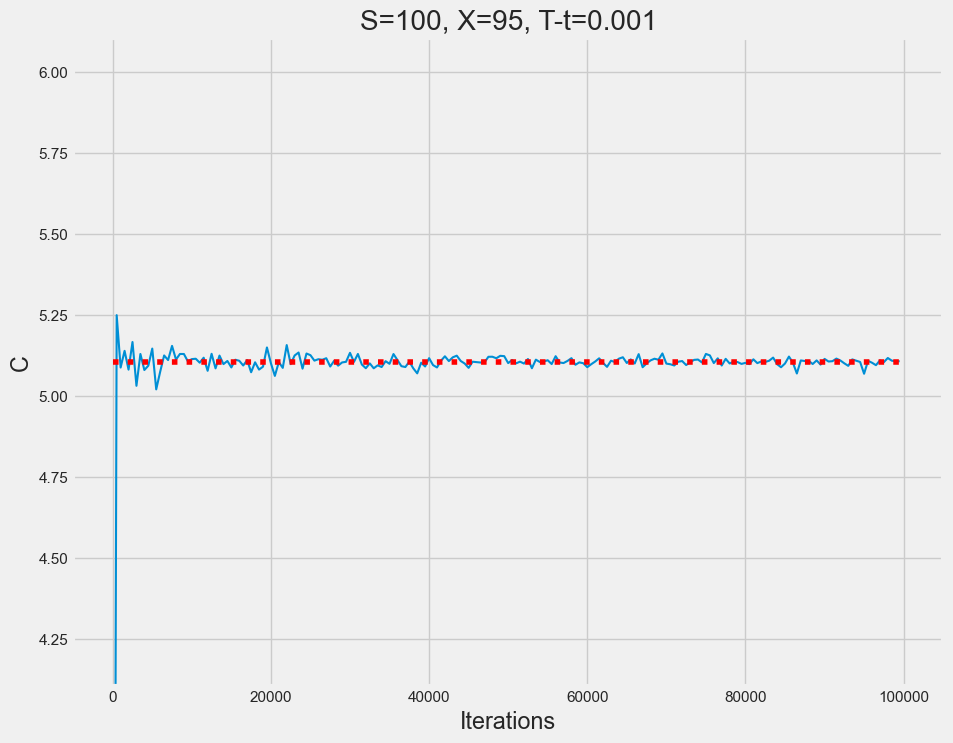

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy.random as npr

# Create lists to store data
iterations = []
bsc_values = []

# Iterate over different number of iterations
for i in range(1, 100000, 500):
    iterations.append(i)
    bsc_values.append(BS_Call_MC(100, 95, 0.06, 0.3, 1, 0.99, i))

# Create DataFrame from lists
df = pd.DataFrame({
    'Iter': iterations,
    'BSc': bsc_values
})

# Plotting
plt.figure(figsize=(10, 8))

# Plot Monte Carlo simulation results from DataFrame
plt.plot(df['Iter'], df['BSc'], lw=1.5)

# Plot exact solution as a dotted red line
plt.hlines(BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.99), xmin=0, xmax=100000, linestyle='dotted', colors='red')

plt.title('S=100, X=95, T-t=0.001')
plt.xlabel('Iterations')
plt.ylabel('C')
plt.ylim(BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.99) - 1, BS_Call_Exact(100, 95, 0.06, 0.3, 1, 0.99) + 1)

plt.show()


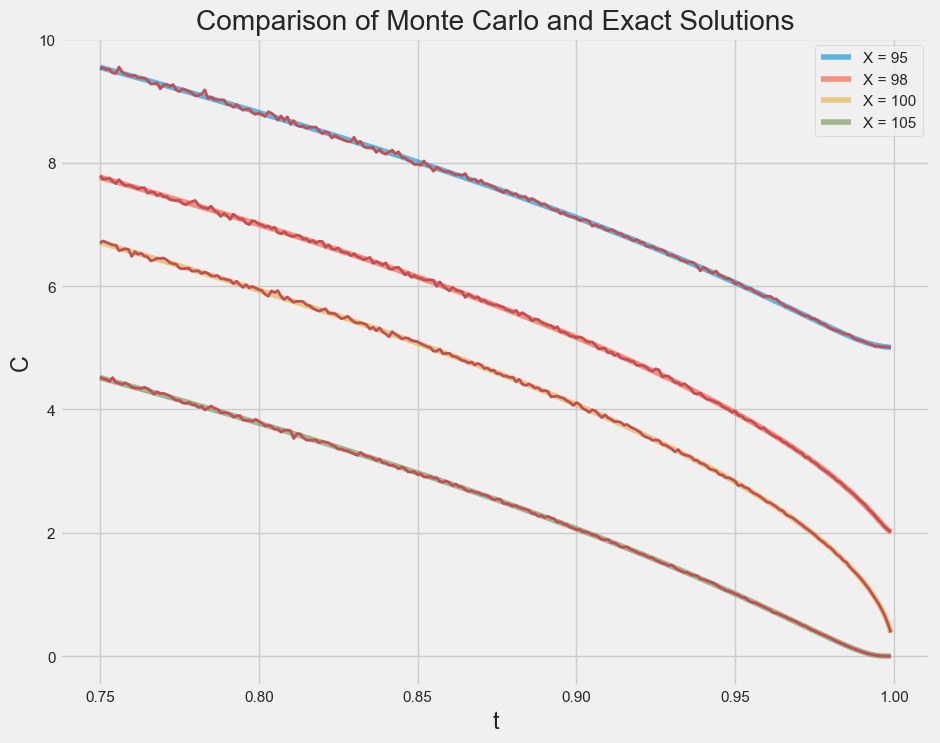

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy.random as npr


# Initialize an empty list to store data
data = []

# Generate array of t values
t = np.arange(0.75, 1.0, 0.001)

# Iterate over t values and compute BS_Call_MC for each strike price
for i in t:
    row = {
        't': i,
        '95': BS_Call_MC(100, 95, 0.06, 0.3, 1, i, 100000),
        '98': BS_Call_MC(100, 98, 0.06, 0.3, 1, i, 100000),
        '100': BS_Call_MC(100, 100, 0.06, 0.3, 1, i, 100000),
        '105': BS_Call_MC(100, 105, 0.06, 0.3, 1, i, 100000)
    }
    data.append(row)

# Create DataFrame from list of dictionaries
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 8))

# Plot exact solutions
plt.plot(t, BS_Call_Exact(100, 95, 0.06, 0.3, 1, t), alpha=0.6, label='X = 95')
plt.plot(t, BS_Call_Exact(100, 98, 0.06, 0.3, 1, t), alpha=0.6, label='X = 98')
plt.plot(t, BS_Call_Exact(100, 100, 0.06, 0.3, 1, t), alpha=0.6, label='X = 100')
plt.plot(t, BS_Call_Exact(100, 105, 0.06, 0.3, 1, t), alpha=0.6, label='X = 105')

# Plot Monte Carlo results from DataFrame
plt.plot(df['t'], df['95'], lw=2, c='r')
plt.plot(df['t'], df['98'], lw=2, c='r')
plt.plot(df['t'], df['100'], lw=2, c='r')
plt.plot(df['t'], df['105'], lw=2, c='r')

plt.legend()
plt.xlabel('t')
plt.ylabel('C')
plt.title('Comparison of Monte Carlo and Exact Solutions')

plt.show()
